# Stiff ODE

Consider the stiff ODE
$$
y' = -100(y - \sin(t)), \qquad t \ge 0
$$
$$
y(0) = 1
$$
The exact solution is
$$
y(t) = \frac{10101}{10001}e^{-100t} - \frac{100}{10001}(\cos t - 100 \sin t)
$$

In [26]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import numpy as np
from matplotlib import pyplot as plt

In [27]:
def f(t,y):
    return -100.0*(y - np.sin(t))

def yexact(t):
    return 10101.0*np.exp(-100*t)/10001.0 - 100.0*(np.cos(t) - 100.0*np.sin(t))/10001.0

## Forward Euler

$$
y_n = y_{n-1} - 100 h [ y_{n-1} - \sin(t_{n-1})]
$$

In [28]:
def ForwardEuler(t0,y0,T,h):
    N = int((T-t0)/h)
    y = np.zeros(N)
    t = np.zeros(N)
    t[0] = t0
    y[0] = y0
    for n in range(1,N):
        y[n] = y[n-1] + h*f(t[n-1],y[n-1])
        t[n] = t[n-1] + h
    return t,y

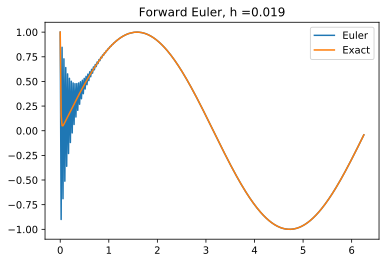

In [29]:
t0 = 0
y0 = 1
T  = 2*np.pi

h  = 0.95*(2.0/100.0)
t,y = ForwardEuler(t0,y0,T,h)

plt.plot(t,y,t,yexact(t))
plt.title("Forward Euler, h ="+str(h))
plt.legend(("Euler","Exact"))

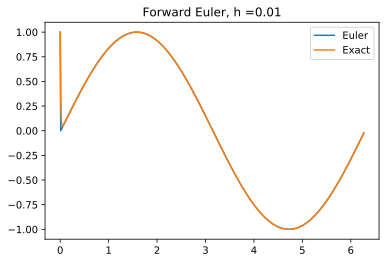

In [30]:
h  = 1.0/100.0
t,y = ForwardEuler(t0,y0,T,h)

plt.plot(t,y,t,yexact(t))
plt.title("Forward Euler, h ="+str(h))
plt.legend(("Euler","Exact"));

## Backward Euler scheme

$$
y_n = y_{n-1} + h [ -100(y_n - \sin(t_n) ]
$$
or
$$
y_n = \frac{ y_{n-1} + 100 h \sin(t_n)}{1 + 100 h}
$$

In [31]:
def BackwardEuler(t0,y0,T,h):
    N = int((T-t0)/h)
    y = np.zeros(N)
    t = np.zeros(N)
    t[0] = t0
    y[0] = y0
    for n in range(1,N):
        t[n] = t[n-1] + h
        y[n] = (y[n-1] + 100.0*h*np.sin(t[n]))/(1.0 + 100.0*h)
    return t,y

## Trapezoidal scheme

$$
y_n = y_{n-1} + \frac{h}{2}[ -100(y_{n-1}-\sin(t_{n-1})) - 100 (y_n - \sin(t_n))]
$$
or
$$
y_n = \frac{(1-50h)y_{n-1} + 50h(\sin(t_{n-1}) + \sin(t_n))}{1 + 50 h}
$$

In [32]:
def Trapezoidal(t0,y0,T,h):
    N = int((T-t0)/h)
    y = np.zeros(N)
    t = np.zeros(N)
    t[0] = t0
    y[0] = y0
    for n in range(1,N):
        t[n] = t[n-1] + h
        y[n] = ((1.0-50.0*h)*y[n-1] + 50.0*h*(np.sin(t[n-1])+np.sin(t[n])))/(1.0 + 50.0*h)
    return t,y

We now run both backward Euler and trapezoidal scheme.

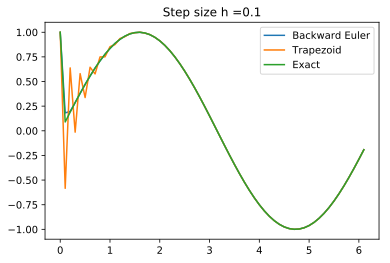

In [34]:
h  = 0.1
t,y = BackwardEuler(t0,y0,T,h)
plt.plot(t,y)

t,y = Trapezoidal(t0,y0,T,h)
plt.plot(t,y)

plt.plot(t,yexact(t))
plt.title("Step size h ="+str(h))
plt.legend(("Backward Euler","Trapezoid","Exact"));

Excercise: Implement BDF2 scheme with BDF1 in the first time step. This should give better results than Trapezoid and is second order accurate.